In [14]:
import pyrenn
from matplotlib import pyplot as plt
from math import sin, cos, sqrt, pi
import numpy as np
import neurolab as nl
import seaborn as sns
import random
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Использовать автоассоциативную сеть с узким горлом для отображения набора данных, выделяя первую главную компоненту данных

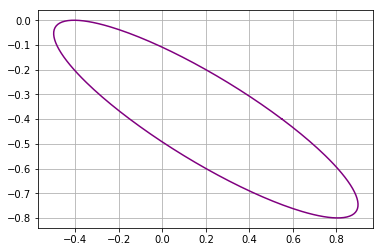

In [15]:
step = 0.025
t = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True) 

x1  = 0.7 * np.cos(t + pi / 3) + 0.2
y1 = 0.4 * np.sin(t ) - 0.4

plt.plot(x1, y1, 'purple')
plt.grid(True)
plt.show()

In [16]:
nn = pyrenn.CreateNN([1, 2, 1])

In [17]:
nn = pyrenn.train_LM(x1, y1, nn, E_stop=1e-5, k_max=100)

Maximum number of iterations reached


In [18]:
y = pyrenn.NNOut(x1, nn)

In [19]:
pca = PCA(1)
arr = np.array([[i, j] for i, j in zip(x1, y1)])
arr = pca.fit_transform(arr)
arr = pca.inverse_transform(arr)

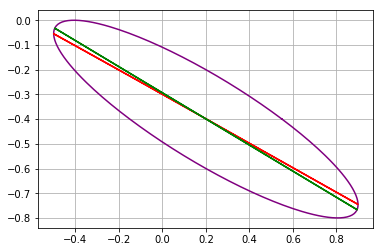

In [20]:
plt.plot(x1, y1, 'purple')
plt.plot(x1, y, 'red')
plt.plot(arr[:, 0], arr[:, 1], 'green')
plt.grid(True)
plt.show()

## Использовать автоассоциативную сеть с узким горлом для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.

/Users/LeGatto53/anaconda3/envs/nn/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


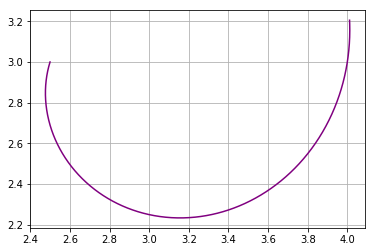

In [21]:
phi = np.linspace(pi, 2 * pi + 0.2, pi / 0.0025)
# coef = lambda phi_i: (-phi_i + 1)
coef = lambda phi_i: (phi_i / (2*np.pi))
x2 = np.array([coef(phi_i) * cos(phi_i) + 3 for phi_i in phi])
y2 = np.array([coef(phi_i) * sin(phi_i) + 3 for phi_i in phi])

plt.plot(x2, y2, 'purple')
plt.grid(True)
plt.show()

In [22]:
nn2 = pyrenn.CreateNN([1, 10, 1,  10, 1])

In [23]:
nn2 = pyrenn.train_LM(x2, y2, nn2, E_stop=1e-5, k_max=500)
y = pyrenn.NNOut(x2, nn2)

Maximum number of iterations reached


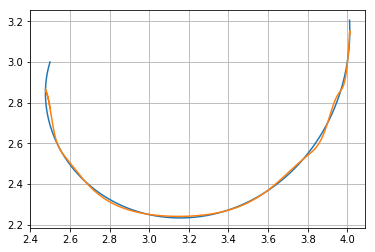

In [24]:
plt.plot(x2, y2)
plt.plot(x2, y)
#plt.plot(y, x1)
plt.grid(True)
plt.show()

## Применить автоассоциативную сеть с узким горлом для аппроксимации пространственной кривой, выделяя старшие нелинейные главные компоненты данных.

In [28]:
%matplotlib notebook

In [25]:
z = phi

In [26]:
nn2 = pyrenn.CreateNN([2, 10, 2,  10, 1])
nn2 = pyrenn.train_LM(np.array([x2, z]), y2, nn2, E_stop=1e-5, k_max=500)
y = pyrenn.NNOut(np.array([x2, z]), nn2)

Termination Error reached


<IPython.core.display.Javascript object>


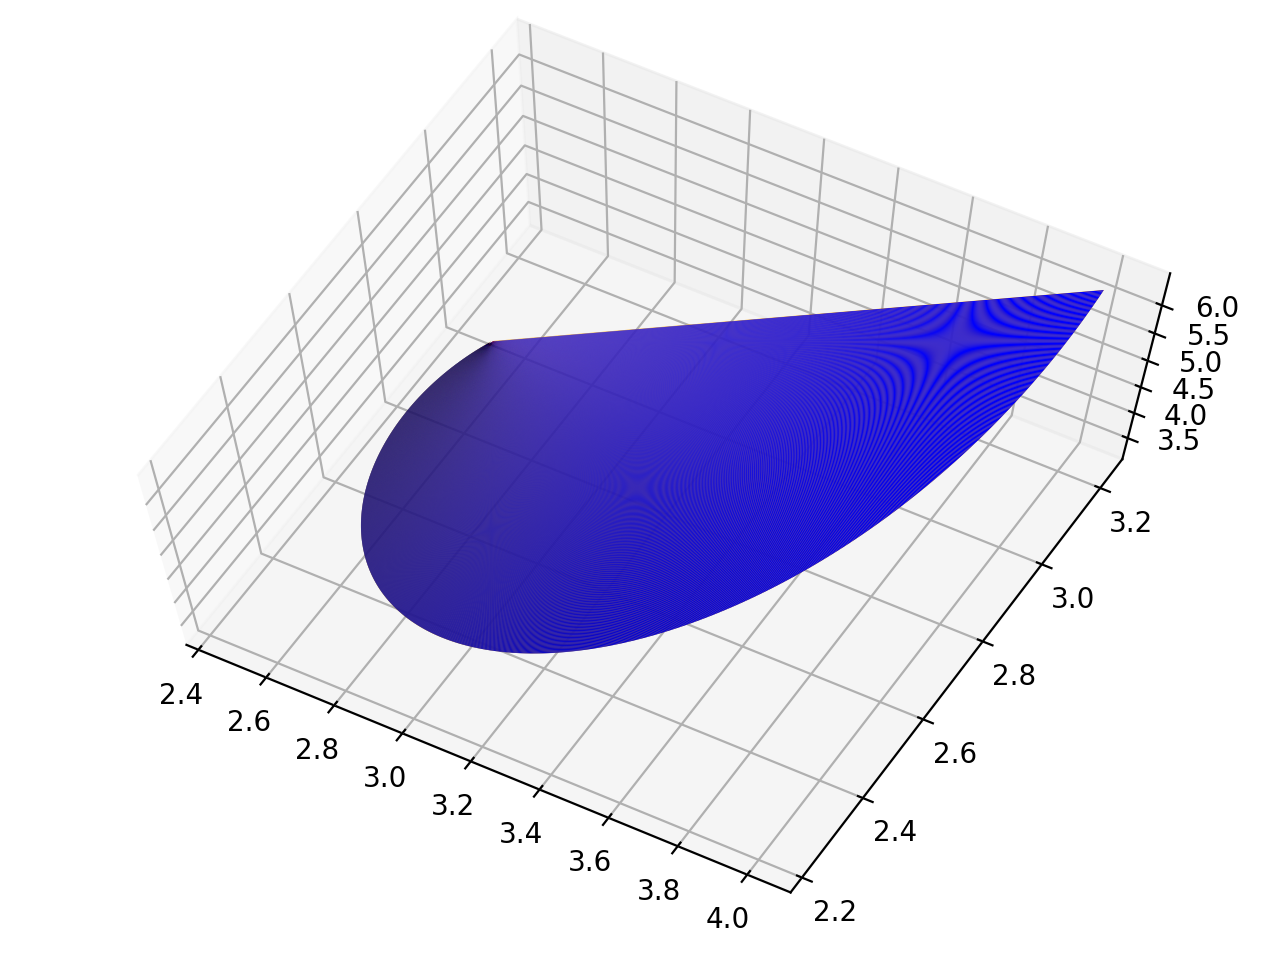

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(x2, y2, z, color='blue')
ax.plot_trisurf(x2, y, z, color='orange')
plt.show()